In [179]:
import pandas as pd # 引用套件並縮寫為 pd  
df_capterra = pd.read_csv('test.csv', encoding='utf_8_sig',index_col=0) 
df_capterra

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review,Title,Overall,Pros,Cons,Switch,Switch_reason,Alter,Alter_reason
0,1,"“Most simple, reliable and efficient meeting ...",I would simply say that it has been the softwa...,"The simplicity and usability of the software, ...",Background noise management is not yet so good...,Google Meet and Microsoft Teams,Users will slow internet speeds had very horri...,Google Meet and Microsoft Teams,"Zoom is very simple to use, no need for sign u..."
1,2,“Zoom Meeting's review”,The implementation of this software has allowe...,"To begin, some of the features that are impact...","Talking about the subject, I consider that the...",NaN,NaN,Google Meet,I think that what convinced me the most to pur...
2,3,"“After the pandemic, everyone in the field kno...","It gets the job done, it has many features, an...",The free plan is pretty generous with up to 10...,I don't like the fact that software needs to b...,NaN,NaN,NaN,NaN
3,4,“Click and start!”,I have had a few techno-phobic clients and eve...,Most people have heard of it and been exposed ...,Moderators for big groups could perhaps be a b...,Google Meet,I chose this over google meet for a few reason...,Google Meet and Google Workspace,When using Google Meet I didn't realise it was...
4,5,“Zoom- Clear audio and HD Video Calling Featur...,"Zoom has the best video conferencing, online m...",Zoom is the clear choice for video conferencin...,No problem to use zoom for business meetings. ...,NaN,NaN,Google Hangouts,Zoom has advance feature to do business meetin...
...,...,...,...,...,...,...,...,...,...
995,996,“Great tool for keeping communication lines open”,The biggest problem that we have solved with i...,Zoom was incredibly easy to integrate into our...,The thing that I felt was lacking with Zoom is...,NaN,NaN,Google Meet,It was much easier to use.
996,997,“Best Virtual Conference Software for the Masses”,Overall zoom was really easy to deploy to our ...,Having used plenty of different software offer...,My issue with the zoom has been their security...,NaN,NaN,NaN,NaN
997,998,"“Easy to use, popular platform. Inexpensive.”",I would totally recommend this to small organi...,Ease of use. Anyone can use it and don't need ...,Logo design could be made more fancy.\nSometim...,NaN,NaN,NaN,NaN
998,999,“Zoom in 2020”,My overall experience has been great! Zoom has...,This software has definitely become more popul...,What I like least about Zoom is that it doesn'...,NaN,NaN,NaN,NaN


In [180]:
# doc_complete = []
# for overall in df_capterra['Overall']:
#     doc_complete.append(str(overall))
# type(doc_complete)
# Convert to list
doc_complete = df_capterra.Pros.values.tolist()
doc_complete[0]

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"The simplicity and usability of the software,  the fact that users don't have to necessarily signup and login in order to attend a meeting (which made over 90% of my novice users  especially in remote villages). The controls well designed and implemented to offer the easiest way possible for users to use them. The meeting experience it offer in spite of slow internet speeds. The wonderful features that like chats, polls, break out rooms, third party integrations had given me the best way to have meetings. Zoom is the best software option for online meetings and is still the best option to use than in person meetings."

In [181]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(doc_complete))

print(data_words[0])

['the', 'simplicity', 'and', 'usability', 'of', 'the', 'software', 'the', 'fact', 'that', 'users', 'don', 'have', 'to', 'necessarily', 'signup', 'and', 'login', 'in', 'order', 'to', 'attend', 'meeting', 'which', 'made', 'over', 'of', 'my', 'novice', 'users', 'especially', 'in', 'remote', 'villages', 'the', 'controls', 'well', 'designed', 'and', 'implemented', 'to', 'offer', 'the', 'easiest', 'way', 'possible', 'for', 'users', 'to', 'use', 'them', 'the', 'meeting', 'experience', 'it', 'offer', 'in', 'spite', 'of', 'slow', 'internet', 'speeds', 'the', 'wonderful', 'features', 'that', 'like', 'chats', 'polls', 'break', 'out', 'rooms', 'third', 'party', 'integrations', 'had', 'given', 'me', 'the', 'best', 'way', 'to', 'have', 'meetings', 'zoom', 'is', 'the', 'best', 'software', 'option', 'for', 'online', 'meetings', 'and', 'is', 'still', 'the', 'best', 'option', 'to', 'use', 'than', 'in', 'person', 'meetings']


C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [182]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['the', 'simplicity', 'and', 'usability', 'of', 'the', 'software', 'the', 'fact', 'that', 'users', 'don', 'have', 'to', 'necessarily', 'signup', 'and', 'login', 'in', 'order', 'to', 'attend', 'meeting', 'which', 'made', 'over', 'of', 'my', 'novice', 'users', 'especially', 'in', 'remote', 'villages', 'the', 'controls', 'well', 'designed', 'and', 'implemented', 'to', 'offer', 'the', 'easiest', 'way', 'possible', 'for', 'users', 'to', 'use', 'them', 'the', 'meeting', 'experience', 'it', 'offer', 'in', 'spite', 'of', 'slow', 'internet', 'speeds', 'the', 'wonderful', 'features', 'that', 'like', 'chats', 'polls', 'break_out_rooms', 'third_party', 'integrations', 'had', 'given', 'me', 'the', 'best', 'way', 'to', 'have', 'meetings', 'zoom', 'is', 'the', 'best', 'software', 'option', 'for', 'online', 'meetings', 'and', 'is', 'still', 'the', 'best', 'option', 'to', 'use', 'than', 'in', 'person', 'meetings']


In [183]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['nan', 'subject', 're', 'edu', 'use'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [184]:
from gensim.utils import simple_preprocess
import spacy

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_trigrams = make_trigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# !python -m spacy download en

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[0])

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['simplicity', 'usability', 'software', 'fact', 'user', 'necessarily', 'signup', 'login', 'order', 'attend', 'meeting', 'make', 'novice', 'user', 'especially', 'remote', 'village', 'control', 'well', 'design', 'implement', 'offer', 'easy', 'way', 'possible', 'user', 'meet', 'experience', 'offer', 'spite', 'slow', 'internet', 'speed', 'wonderful', 'feature', 'chat', 'poll', 'break', 'room', 'integration', 'give', 'good', 'way', 'meeting', 'zoom', 'good', 'software', 'option', 'online', 'meeting', 'still', 'good', 'option', 'person', 'meeting']


In [185]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 3), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 4), (19, 1), (20, 1), (21, 2), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 3), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1)]]


C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [174]:
# Build LDA model
import matplotlib.pyplot as plt
topics = []
Coherence_Score = []

for i in range(1,21):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=i, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    topics.append(i)
    Coherence_Score.append(coherence_lda)
    


C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


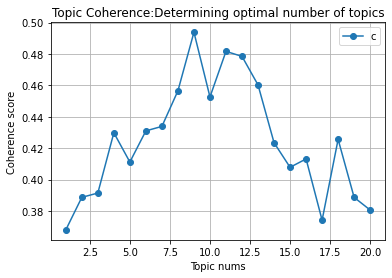

In [175]:
lines = plt.plot(topics,Coherence_Score)
plt.setp(lines,marker = "o") 
plt.grid(True)
plt.title("Topic Coherence:Determining optimal number of topics") 
plt.xlabel("Topic nums")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [186]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [187]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"cost" + 0.013*"free_version" + 0.013*"require" + 0.012*"long" + '
  '0.012*"month" + 0.011*"image" + 0.011*"often" + 0.010*"box" + '
  '0.010*"appreciate" + 0.010*"ensure"'),
 (1,
  '0.024*"technical" + 0.022*"gathering" + 0.020*"utilize" + 0.014*"webex" + '
  '0.014*"competitor" + 0.013*"slack" + 0.012*"fix" + 0.012*"incredible" + '
  '0.011*"instead" + 0.009*"customize"'),
 (2,
  '0.026*"training" + 0.015*"class" + 0.012*"version" + 0.011*"require" + '
  '0.009*"teacher" + 0.009*"activity" + 0.008*"definitely" + '
  '0.008*"enterprise" + 0.008*"pick" + 0.007*"purpose"'),
 (3,
  '0.042*"zoom" + 0.038*"meeting" + 0.025*"easy" + 0.019*"feature" + '
  '0.018*"video" + 0.015*"screen" + 0.014*"share" + 0.013*"software" + '
  '0.013*"use" + 0.013*"also"'),
 (4,
  '0.024*"email" + 0.013*"inexpensive" + 0.013*"happy" + 0.012*"educational" + '
  '0.010*"surprise" + 0.010*"network" + 0.009*"particular" + '
  '0.009*"improvement" + 0.009*"instruction" + 0.008*"lock"'),
 (5,
  '0.0

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [188]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -6.704281367443588

Coherence Score:  0.5579506640031153


In [189]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.400563  0.001822       1        1  83.834346
2     -0.073590 -0.231508       2        1   3.918381
0     -0.078598  0.123510       3        1   3.650684
6     -0.079823  0.089183       4        1   3.318032
1     -0.060998  0.003767       5        1   2.244988
5     -0.054218  0.005474       6        1   1.759875
4     -0.053336  0.007752       7        1   1.273694, topic_info=              Term         Freq        Total Category  logprob  loglift
114       business    95.000000    95.000000  Default  30.0000  30.0000
134          class    79.000000    79.000000  Default  29.0000  29.0000
43            zoom  1171.000000  1171.000000  Default  28.0000  28.0000
18         meeting  1057.000000  1057.000000  Default  27.0000  27.0000
823       training    33.000000    33.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
2427           sin     1.709050     2.420826   Topic7  -5.5095   4.0151
1854          feed     1.684806     2.397658   Topic7  -5.5238   4.0104
2201  participante     1.628411     2.340274   Topic7  -5.5579   4.0006
1630       respond     1.453354     2.167279   Topic7  -5.6716   3.9637
2478      disperse     1.422881     2.134840   Topic7  -5.6928   3.9575

[269 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
363       1  0.886734     account
363       3  0.115661     account
778       2  0.947980    activity
1587      2  0.909591  additional
102       7  0.622693     address
...     ...       ...         ...
131       1  0.998992        work
2098      7  0.881627   workforce
1346      6  0.888066       worry
153       3  0.904836     youtube
43        1  0.999660        zoom

[282 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 7, 2, 6, 5])

### LDA 法一

In [62]:
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
import string

nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

exclude = set(string.punctuation)
lemma = WordNetLemmatizer()


def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]
doc_clean[1]

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lindy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lindy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['begin',
 'feature',
 'impactful',
 'job',
 'screen',
 'sharing',
 'screen',
 'recording',
 'set',
 'applicantions',
 'recently',
 'included',
 'furthermore',
 'consider',
 'app',
 'difficult',
 'use',
 'actually',
 'got',
 'used',
 'zoom',
 'meeting',
 'easily',
 'colleague',
 'truly',
 'believe',
 'implementation',
 'tool',
 'job',
 'helped',
 'u',
 'create',
 'direct',
 'connection',
 'costumer']

In [25]:
from nltk import ngrams
import gensim
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(doc_clean, min_count=1, threshold=1,connector_words=ENGLISH_CONNECTOR_WORDS) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[doc_clean], threshold=1)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[doc_clean[1]]])

['implementation', 'software', 'allowed_u', 'reach', 'international', 'contact', 'service', 'creating', 'safe', 'platform', 'interact_client', 'directly', 'one', 'outstanding', 'advantage', 'using_zoom_meeting', 'work', 'high_quality', 'experience', 'create', 'costumer', 'using', 'variety', 'tool', 'provided', 'software', 'application', 'remote_control', 'more', 'host', 'problem_solving', 'people']


In [26]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in str(doc) if word not in stop] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [8]:
# Form Bigrams
data_words_bigrams = make_trigrams(doc_clean)

print(data_words_bigrams)

[['would', 'simply', 'say_software', 'ever', 'needed', 'new', 'additional', 'exiting', 'helpful', 'feature', 'taken', 'experience', 'new', 'height', 'simply', 'best'], ['implementation', 'software', 'allowed_u', 'reach', 'international', 'contact', 'service', 'creating', 'safe', 'platform', 'interact_client', 'directly', 'one', 'outstanding', 'advantage', 'using_zoom_meeting', 'work', 'high_quality', 'experience', 'create', 'costumer', 'using', 'variety', 'tool', 'provided', 'software', 'application', 'remote_control', 'more', 'host', 'problem_solving', 'people'], ['get_job_done', 'many_feature', 'generous', 'free_plan', 'oneonone_meeting', 'general', 'use', 'type', 'service', 'like', 'reliable', 'hammer', 'good_thing', 'good', 'many', 'specific', 'thing', 'need_something', 'specific_usecase', 'thing', 'might', 'better', 'suited', 'you', 'course_need', 'something', 'throw_presentation', 'every_month', 'every', 'then', 'pretty_good', 'that', 'although', 'price', 'justify', 'low_use', 'c

In [9]:
import gensim
from gensim import corpora

# 創建語料的詞語詞典，每個單獨的詞語都會被賦予一個索引
dictionary = corpora.Dictionary(data_words_bigrams)

# 使用上面的詞典，將轉換文檔列表（語料）變成 DT 矩陣
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_words_bigrams]
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 1)],
 [(4, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1)],
 [(37, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 2),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 2),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 2),
  (89, 1

In [10]:
# 使用 gensim 來創建 LDA 模型對象
Lda = gensim.models.ldamodel.LdaModel

# 在 DT 矩陣上運行和訓練 LDA 模型
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)

In [11]:
print(ldamodel.print_topics(num_topics=10))

[(0, '0.016*"zoom" + 0.007*"meeting" + 0.006*"user" + 0.005*"overall" + 0.005*"using_zoom" + 0.005*"without" + 0.005*"use_zoom" + 0.005*"good" + 0.004*"use" + 0.004*"feature"'), (1, '0.013*"zoom" + 0.009*"meeting" + 0.006*"also" + 0.006*"zoom_meeting" + 0.006*"use" + 0.005*"issue" + 0.005*"way" + 0.004*"tool" + 0.004*"it" + 0.004*"one"'), (2, '0.013*"meeting" + 0.012*"call" + 0.010*"time" + 0.010*"zoom" + 0.007*"great" + 0.005*"using_zoom" + 0.005*"easy" + 0.005*"team" + 0.005*"overall" + 0.004*"feature"'), (3, '0.009*"meeting" + 0.008*"experience" + 0.006*"use" + 0.006*"tool" + 0.005*"team" + 0.005*"use_zoom" + 0.005*"best" + 0.005*"zoom" + 0.004*"zoom_meeting" + 0.004*"one"'), (4, '0.019*"zoom" + 0.007*"video_conferencing" + 0.006*"need" + 0.006*"office" + 0.004*"overall_zoom" + 0.004*"team" + 0.004*"used" + 0.004*"use" + 0.004*"software" + 0.003*"meeting"'), (5, '0.012*"zoom" + 0.009*"product" + 0.009*"use" + 0.006*"meeting" + 0.006*"zoom_meeting" + 0.006*"like" + 0.005*"work" + 0.0

In [12]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.538189658544407

Coherence Score:  0.35654569142482556


### LDA 法二

In [108]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, 
                                       id2word=id2word, 
                                       num_topics=10, 
                                       random_state=100, 
                                       chunksize=100, 
                                       passes=10, 
                                       per_word_topics=True)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.024*"meeting" + 0.023*"feature" + 0.022*"zoom" + 0.018*"screen" + '
  '0.018*"also" + 0.018*"share" + 0.016*"allow" + 0.015*"host" + 0.014*"use" + '
  '0.013*"chat"'),
 (1,
  '0.038*"zoom" + 0.027*"easy" + 0.016*"use" + 0.013*"get" + 0.013*"user" + '
  '0.011*"business" + 0.011*"pandemic" + 0.010*"meeting" + 0.009*"people" + '
  '0.008*"even"'),
 (2,
  '0.039*"zoom" + 0.022*"software" + 0.017*"easy" + 0.016*"use" + 0.012*"work" '
  '+ 0.011*"feature" + 0.011*"meeting" + 0.011*"make" + 0.010*"screen" + '
  '0.010*"student"'),
 (3,
  '0.044*"meeting" + 0.034*"zoom" + 0.027*"easy" + 0.020*"feature" + '
  '0.019*"video" + 0.017*"screen" + 0.016*"share" + 0.012*"also" + '
  '0.011*"make" + 0.011*"quality"'),
 (4,
  '0.025*"easy" + 0.012*"make" + 0.011*"meeting" + 0.011*"zoom" + 0.010*"able" '
  '+ 0.009*"software" + 0.008*"also" + 0.007*"feature" + 0.007*"time" + '
  '0.007*"hand"'),
 (5,
  '0.029*"meeting" + 0.024*"zoom" + 0.020*"work" + 0.014*"easy" + '
  '0.012*"allow" + 0.012*

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.3781122716334761


In [93]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

 11%|█████████                                                                      | 62/540 [14:48<1:55:27, 14.49s/it]


  0%|                                                                                          | 0/540 [30:25<?, ?it/s]

 24%|██████████████████▍                                                           | 128/540 [30:52<1:40:52, 14.69s/it]


 36%|████████████████████████████                                                  | 194/540 [46:35<1:20:03, 13.88s/it]


 48%|████████████████████████████████████▌                                       | 260/540 [1:01:52<1:05:27, 14.03s/it]


 60%|███████████████████████████████████████████████                               | 326/540 [1:17:58<51:48, 14.53s/it]


 73%|████████████████████████████████████████████████████████▌                     | 392/540 [1:33:48<35:07, 14.24s/it]


 85%|██████████████████████████████████████████████████████████████████▏           | 458/540 [1:50:12<20:03, 14.67s/it]


 97%|███████████████████████████████████████████████████████████████████████████▋  | 524/540 [2:06:20<03:59, 14.98s/it]


100%|██████████████████████████████████████████████████████████████████████████████| 540/540 [2:10:13<00:00, 14.47s/it]


In [115]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.91,
                                           eta=0.91)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.36234779094529396


In [114]:
# !pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\lindy\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.183433  0.000548       1        1  71.340992
8     -0.008453 -0.013816       2        1   5.298651
2      0.013261  0.016711       3        1   4.206442
0      0.011204  0.002529       4        1   3.436912
5      0.031109 -0.001798       5        1   3.398365
6      0.018849  0.002244       6        1   3.342570
7      0.041380 -0.002129       7        1   3.055659
1      0.035391 -0.001912       8        1   2.963721
4      0.040692 -0.002378       9        1   2.956688, topic_info=         Term        Freq       Total Category  logprob  loglift
43       zoom  905.000000  905.000000  Default  30.0000  30.0000
421   student   63.000000   63.000000  Default  29.0000  29.0000
125      host  101.000000  101.000000  Default  28.0000  28.0000
5        easy  509.000000  509.000000  Default  27.0000  27.0000
33   software  277.000000  277.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
99       time    0.705888  181.507761   Topic9  -7.2359  -2.0285
57        get    0.659232  104.938645   Topic9  -7.3043  -1.5490
411      need    0.674715  137.151131   Topic9  -7.2811  -1.7934
186      even    0.660484  147.856703   Topic9  -7.3024  -1.8899
2        chat    0.659307  176.704901   Topic9  -7.3042  -2.0699

[597 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
233       1  0.945155  able
233       2  0.008833  able
233       3  0.008833  able
233       4  0.008833  able
233       5  0.008833  able
...     ...       ...   ...
43        5  0.004415  zoom
43        6  0.007727  zoom
43        7  0.003311  zoom
43        8  0.004415  zoom
43        9  0.003311  zoom

[1249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 3, 1, 6, 7, 8, 2, 5])